## One dimensional Bayesian Optimisation for continuous functions
We will define arbitrary one dimensional function $myf(x)$ and use Bayesian Optimisation method to find its maximum.

Let us define a one-dimensional function of interest f as $x^2 sin(5πx)^6$. Assume that we are only interested in the region where $x ∈ [0, 1.6]$ and that we want to find global maximum within these bounds.

In [14]:
# Loading required packages
import GPyOpt
from numpy.random import seed
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defining function of interest
def myf(x):
    return x**2 * sin(5 * pi * x)**6.0

# Creating problem constraints
bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1.6)}]

Let's see how our objective function looks like:

Text(0.5, 1.0, '$f(x) = x^2\\sin^{6}(5\\pi x)$')

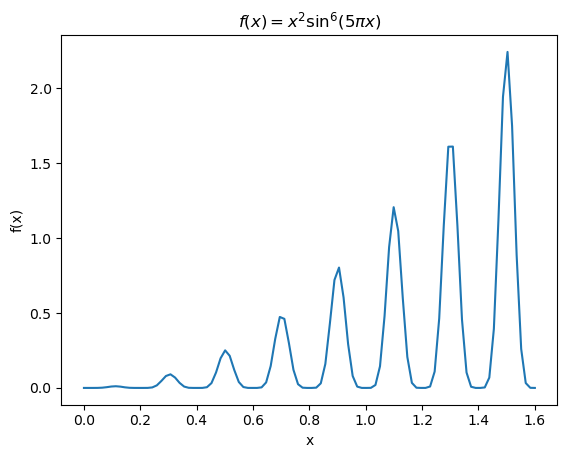

In [15]:
# Plotting our objective function first
x = linspace(0, 1.6, 100)
y = myf(x)
plt.figure(1)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = x^2\sin^{6}(5\pi x)$')



Looking at the figure above, one can immediately notice that this function has many *local* maxima (at least 7 visible peaks), but only one distinct *global* maximum.
Let us further assume that initially, all we know about this function f is a single data point, $f(0) = 0$.


In [16]:
# x = 0
X_init = np.array([[0.0]])
# myf(x=0) 
Y_init = myf(X_init)

Creating Bayesian Optimisation object with the parameters of our choice (using **probability of improvement** as acquisition function) and defining arbitrary optimisation budget of 35 iterations and minimum allowed distance between the last two observations to be $10^{-6}$:

In [17]:
# Setting seed so that the same results could bet reproduced
seed(67)
# Creating Bayesian Optimisation object with the parameters of our choice:
OneD_BO_PoI = GPyOpt.methods.BayesianOptimization(X = X_init,           # x coordinate of first evaluation
                                                  Y = Y_init,           # f(x) value of first evaluation
                                                  f=myf,                # function to optimize
                                                  domain=bounds,        # box-constraints of the problem
                                                  acquisition_type='MPI',  # selects the probability of improvement
                                                  exact_feval=True,     # we want exact outputs, not rounded
                                                  normalize_Y=False,    # we choose not to rescale y axis
                                                  maximize=True,        # we are maximising our function
                                                  initial_design_numdata= 1) # only one initial data point (defined as
# X and Y) will be known before we start optimisation

# Define optimisation budgets
max_iter = 35    # evaluation budget
max_time = 60    # time budget
eps = 10e-6      # minimum allowed distance between the last two observations

Now let's run Bayesian Optimisation with previously defined parameters and plot resulting acquisition function (probability of improvement)

In [19]:
# Run Optimization with defines optimisation budget
OneD_BO_PoI.run_optimization(max_iter, max_time, eps)

# Plotting the acquisition function (probability of improvement)
OneD_BO_PoI.plot_acquisition(label_y = '-f(x)')

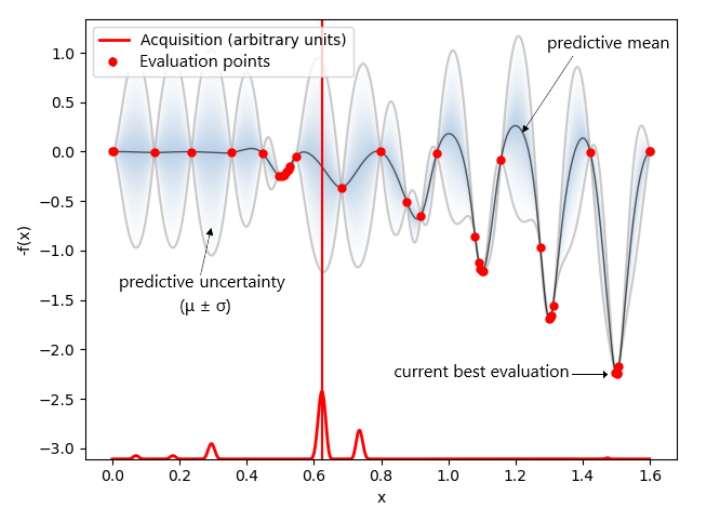

Figure above shows Bayesian optimisation results using probability of improvement with 35 iteration budget.
This plot represents the current state of the algorithm after 35 iterations. Acquisition function
(probability of improvement) located at the bottom of the graph (in red) indicate the next evaluation location
(vertical red line) if we were to perform 36th iteration

One can see that global maximum was found:

In [20]:
# Printing value of x and f(x) where function is found to be maximum
print("="*60)
print("Value of x that maximize the objective:"+str(OneD_BO_PoI.x_opt))
print("Maximum value of the objective function:"+str((-1)*OneD_BO_PoI.fx_opt))
print("="*60)

Value of x that maximize the objective:[1.50094644]
Maximum value of the objective function:2.2513469066026404


And that convergence to that maximum can be visualised as

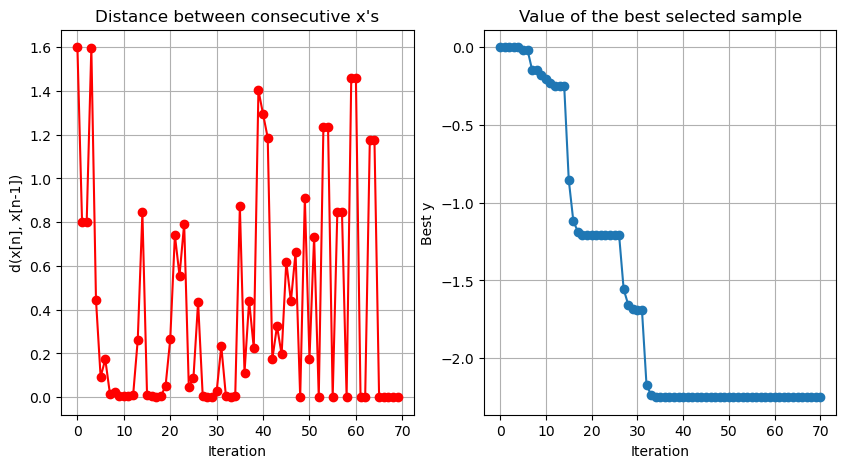

In [21]:
# Plotting convergence plots
OneD_BO_PoI.plot_convergence()

Hence one can notice that global maximum of our arbitrary function $myf(x)$ was found only within 35 intertaions.

Now lets explore how different our results would be if we run Bayesian Optimisation using **expected improvement** acquisition function instead of probability of improvement.

In [23]:
# Setting seed
seed(130)

# Creating Bayesian optimisation object
OneD_BO_EI = GPyOpt.methods.BayesianOptimization(X = X_init,           # x coordinate of first evaluation
                                                  Y = Y_init,           # f(x) value of first evaluation
                                                  f=myf,                # function to optimize
                                                  domain=bounds,        # box-constraints of the problem
                                                  acquisition_type='EI',  # selects the expected improvement
                                                  exact_feval=True,     # we want exact outputs, not rounded
                                                  normalize_Y=False,    # we choose not to rescale y axis
                                                  maximize=True,        # we are maximising our function
                                                  initial_design_numdata= 1) # only one initial data point (defined as
# X and Y) will be known before we start optimisation

# Run the Optimization
OneD_BO_EI.run_optimization(max_iter, max_time, eps)

# Plot my acquisition function (expected improvement)
OneD_BO_EI.plot_acquisition(label_y = '-f(x)')



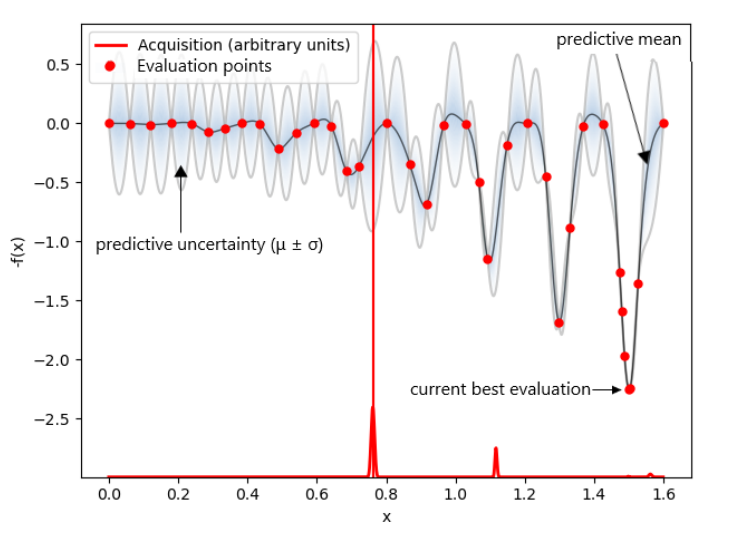

Figure above shows Bayesian optimisation results using expected improvement with 35 iteration budget. This
plot represents the current state of the algorithm after 35 iterations. Acquisition function (expected
improvement) located at the bottom of the graph indicate the next evaluation location (vertical red
line) if we were to perform 36th iteration.

Now let's see where global maximum was found and where every iteration's loctaion was:

Value of x that maximize the objective:[1.50016856]
Maximum value of the objective function:2.25045838009533


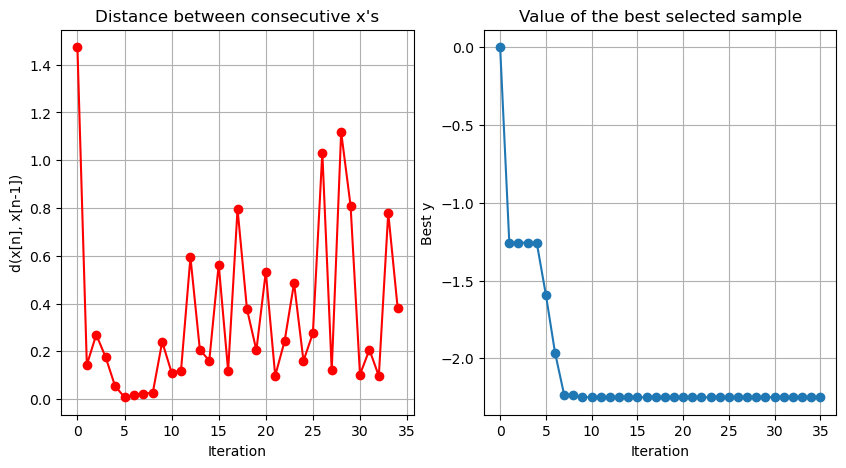

x              f(x)
                     0
0.000000  0.000000e+00
1.473244 -1.256909e+00
1.329975 -8.861286e-01
1.600000 -2.263836e-90
1.425003 -6.382787e-03
1.479448 -1.592180e+00
1.487370 -1.964363e+00
1.503936 -2.236020e+00
1.526639 -1.356314e+00
1.500169 -2.250458e+00
1.260177 -4.506621e-01
1.149028 -1.806102e-01
1.029263 -8.076721e-03
0.435313 -4.044903e-03
0.641825 -2.137573e-02
0.802874 -5.444532e-09
0.239483 -2.210617e-03
0.120647 -1.055638e-02
0.916429 -6.862006e-01
0.539467 -8.460143e-02
0.335074 -4.295598e-02
0.868053 -3.421557e-01
0.965692 -1.703627e-02
0.722073 -3.608252e-01
1.208280 -6.946755e-06
1.368554 -2.127223e-02
1.092740 -1.148300e+00
0.060484 -1.060036e-03
0.180354 -2.553739e-05
1.298188 -1.681201e+00
0.488044 -2.141378e-01
0.590865 -2.985551e-06
0.383895 -3.622386e-05
0.287216 -7.303291e-02
1.067208 -4.947164e-01
0.685733 -4.039380e-01


In [24]:
# Printing value of x and f(x) where function is found to be maximum
print("="*60)
print("Value of x that maximize the objective:"+str(OneD_BO_EI.x_opt))
print("Maximum value of the objective function:"+str((-1)*OneD_BO_EI.fx_opt))
print("="*60)

# Plotting convergence plots
OneD_BO_EI.plot_convergence()

# Printing exact values of ALL x and f(x) sampled for each iteration of optimisation
outs = OneD_BO_EI.get_evaluations()[0].flatten()
ins = OneD_BO_EI.get_evaluations()[1].flatten()
evals = pd.DataFrame(ins, outs)
print('x              f(x)')
print(evals)

*Please refer to pdf thesis document for full in depth analysis of this exmaple and the theory behind it.*